Saved ensemble_total_violin_plot_fut.png


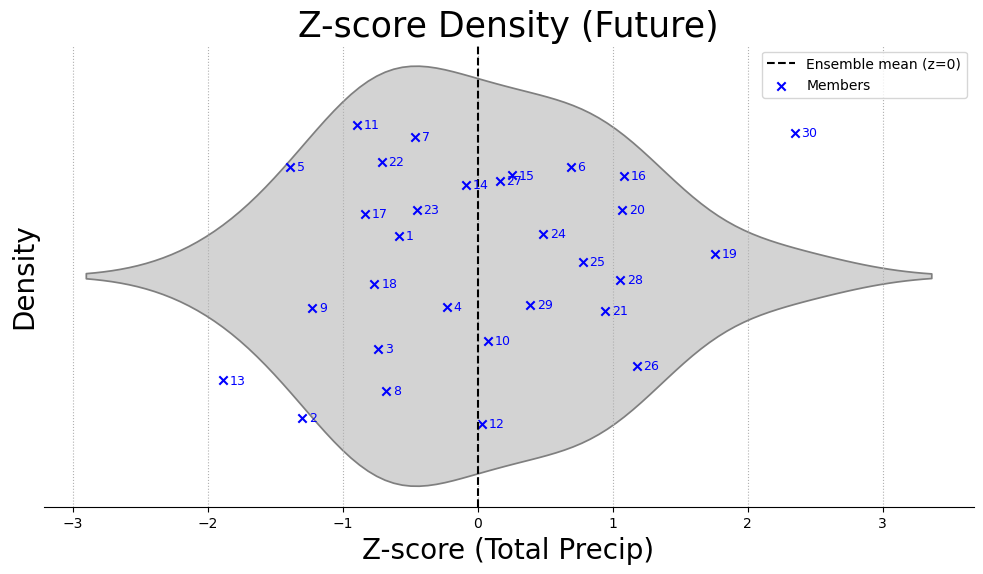

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os 

# --- 1. Load Your Data ---
csv_filename = 'ensemble_member_total_stats_fut.csv'

try:
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"Error: '{csv_filename}' not found. Using dummy data for demonstration.")
    # Create dummy data suitable for total precipitation values
    data = {
        'member': [f'pp_ens_{i:02d}' for i in range(1, 31)],
        'total_precip_mm': np.random.normal(loc=5000, scale=150, size=30), # Example totals in mm
        'std_dev_mm': np.random.normal(loc=100, scale=5, size=30),
        'error': ['' for _ in range(30)]
    }
    df = pd.DataFrame(data)


# --- 2. Data Preprocessing & Statistics ---

# Extract member index number for plotting
if 'member' in df.columns:
    df['member_index'] = df['member'].str.split('_').str[-1].astype(int)
    df = df.sort_values('member_index').reset_index(drop=True)
else:
    df['member_index'] = df.index + 1 


# Calculate ensemble mean and std dev of the TOTALS
mean_of_totals = df['total_precip_mm'].mean()
std_of_totals = df['total_precip_mm'].std()

# Calculate Z-score for each member's total precipitation
df['total_z'] = (df['total_precip_mm'] - mean_of_totals) / std_of_totals

# --- 3. Plot 2: Horizontal Violin Plot ---

# Create figure
plt.figure(figsize=(12, 6))

# Plot the violin plot first (in the background)
# We plot the Z-scores of the TOTAL precipitation
sns.violinplot(x=df['total_z'], color='lightgrey', inner=None) # 'inner=None' removes the boxplot inside

# Plot the central mean line
plt.axvline(0, color='black', linestyle='--', label='Ensemble mean (z=0)')

# Create random y-values for jitter for ALL members
np.random.seed(42) # for reproducible jitter
df['jitter_y'] = np.random.uniform(-0.3, 0.3, len(df))

# Plot all individual members as a scatter plot with blue 'x' markers
plt.scatter(df['total_z'], df['jitter_y'], 
            marker='x', color='blue', label='Members') 

# Add text labels for ALL points in blue
for _, row in df.iterrows():
    plt.text(row['total_z'] + 0.05, row['jitter_y'], int(row['member_index']), 
             fontsize=9, color='blue', ha='left', va='center')

# Final plot formatting
plt.title('Z-score Density (Future)', fontsize=25)
plt.xlabel('Z-score (Total Precip)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.yticks([]) # Remove y-axis ticks
plt.legend()
plt.grid(True, linestyle=':', axis='x')
sns.despine(left=True) # Remove left y-axis spine

# Only save if we loaded the real file
if 'member' in df.columns and 'total_precip_mm' in df.columns: 
    output_file = "ensemble_total_violin_plot_fut.png"
    plt.savefig(output_file)
    print(f"Saved {output_file}")
else:
    print("Plot generated, but not saved (using dummy data).")

# plt.show() # Use plt.show() to display interactively